In [1]:
'''
Author : Mateus Eloi da SIlva Bastos
Date: Nov. 2021

This project contains some analyzes made over the exchange rate over the years.
Enjoy :)
'''

#imports
import pandas as pd
import logging
import matplotlib.style as style
import matplotlib.pyplot as plt
#%matplotlib inline

# Logging configs
logging.basicConfig(
    filename='./Logs/exchange_analyses.log',
    level=logging.INFO,
    filemode='w',
    format='%(name)s - %(levelname)s - %(message)s')

In [25]:
# Function to read csv files
def read_data(file_path):
    """
    Read data from csv file path.

    Args:
      file_path (str): csv file path to read.
    
    Return:
        df (DataFrame): returns a dataframe generated by csv file.
    """
    try:
        df = pd.read_csv(file_path)
        return df
    except: # pylint: disable=bare-except
        logging.error("File does not found {}".format(file_path))
        
exchange_rates = read_data("euro-daily-hist_1999_2020.csv")

In [3]:
# explore some details
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [4]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [5]:
exchange_rates.columns

Index(['Period\Unit:', '[Australian dollar ]', '[Bulgarian lev ]',
       '[Brazilian real ]', '[Canadian dollar ]', '[Swiss franc ]',
       '[Chinese yuan renminbi ]', '[Cypriot pound ]', '[Czech koruna ]',
       '[Danish krone ]', '[Estonian kroon ]', '[UK pound sterling ]',
       '[Greek drachma ]', '[Hong Kong dollar ]', '[Croatian kuna ]',
       '[Hungarian forint ]', '[Indonesian rupiah ]', '[Israeli shekel ]',
       '[Indian rupee ]', '[Iceland krona ]', '[Japanese yen ]',
       '[Korean won ]', '[Lithuanian litas ]', '[Latvian lats ]',
       '[Maltese lira ]', '[Mexican peso ]', '[Malaysian ringgit ]',
       '[Norwegian krone ]', '[New Zealand dollar ]', '[Philippine peso ]',
       '[Polish zloty ]', '[Romanian leu ]', '[Russian rouble ]',
       '[Swedish krona ]', '[Singapore dollar ]', '[Slovenian tolar ]',
       '[Slovak koruna ]', '[Thai baht ]', '[Turkish lira ]', '[US dollar ]',
       '[South African rand ]'],
      dtype='object')

In [6]:
# Run some transformations to make the data easier to analyze
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates.Time = pd.to_datetime(exchange_rates.Time)
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [7]:
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [8]:
# Taking just dollar values to analyse
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]

In [9]:
# look the '-' values on US_dollar column, we should fix it!
euro_to_dollar.US_dollar.value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
          ..
1.2571     1
1.2610     1
1.2651     1
1.2632     1
1.2193     1
Name: US_dollar, Length: 3528, dtype: int64

In [10]:
# Fixing (Drop the '-' rows)
euro_to_dollar.drop(euro_to_dollar[euro_to_dollar.US_dollar == '-'].index, inplace=True)

/home/mateus/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
# Great!
euro_to_dollar.US_dollar.value_counts()

1.2276    9
1.1215    8
1.1305    7
1.3373    6
1.3532    6
         ..
1.2571    1
1.2610    1
1.2651    1
1.2632    1
1.2193    1
Name: US_dollar, Length: 3527, dtype: int64

In [12]:
# Transform US_dollar to a float type
euro_to_dollar.US_dollar = pd.to_numeric(euro_to_dollar.US_dollar, downcast="float")

/home/mateus/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [13]:
# Great!
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float32       
dtypes: datetime64[ns](1), float32(1)
memory usage: 110.1 KB


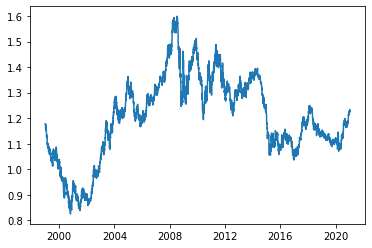

In [14]:
# Plotting the exchange_rates on time 

plt.plot(euro_to_dollar.Time,
         euro_to_dollar.US_dollar)

plt.show()

In [15]:
# add a new column called rolling_mean. Basically we just get a mean of 30 days to reduce the number of point on graph 
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

/home/mateus/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [16]:
# Let's analyze the behavior of the exchange rate in different governments (bush, Obama and Trump)

# Get data from bush, Obama and Trump governments

# bot = (b)ush (o)bama (t)rump :)
bot = euro_to_dollar[(euro_to_dollar.Time.dt.year >= 2001) & euro_to_dollar.Time.dt.year < 2021]

bush = bot[bot.Time.dt.year < 2009]
obama = bot[(bot.Time.dt.year >= 2009) & (bot.Time.dt.year < 2017)]
trump = bot[bot.Time.dt.year >= 2017]


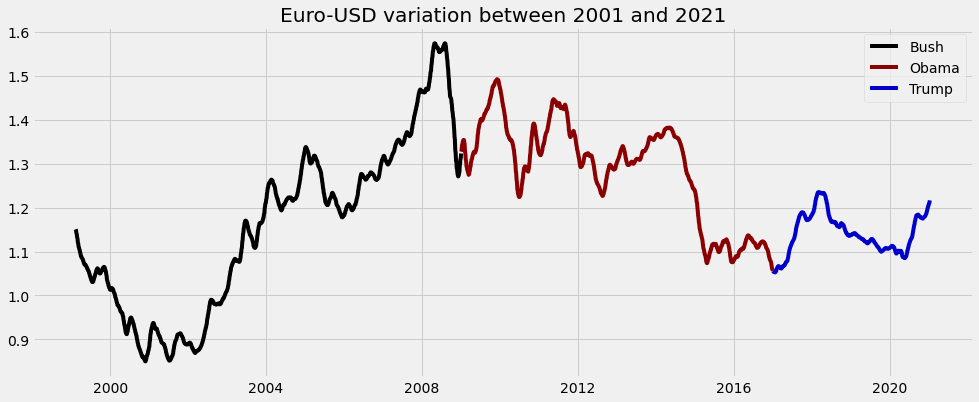

In [17]:
# Plotting the Euro-USD variation by Presidents

style.use('fivethirtyeight')

plt.figure(figsize=(15, 6))

plt.plot(bush.Time, bush.rolling_mean,
         label="Bush", color='#000000')
plt.plot(obama.Time, obama.rolling_mean,
         label="Obama", color='#8B0000')
plt.plot(trump.Time, trump.rolling_mean,
         label="Trump", color='#0000CD')

plt.legend()
plt.title('Euro-USD variation between 2001 and 2021')

plt.savefig("Images/Euro_USD.png")

In [18]:
# Make the same thing to Real 

# Analyse Euro-Real Exchange rate Variation 

# Transform Real Column
exchange_rates.rename(columns={'[Brazilian real ]': 'Real'}, inplace = True)

euro_to_real = exchange_rates[['Time', 'Real']]
euro_to_real.drop(euro_to_real[euro_to_real.Real == '-'].index, inplace=True)


/home/mateus/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
euro_to_real.Real = pd.to_numeric(euro_to_real.Real, downcast="float")

/home/mateus/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


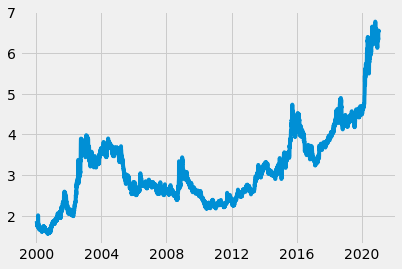

In [20]:
# Plotting the Euro-Real exchange_rates on time 

plt.plot(euro_to_real.Time,
         euro_to_real.Real)

plt.show()

In [21]:
# Getting a mean of 30 days to reduce the number of point on graph 
euro_to_real['rolling_mean'] = euro_to_real['Real'].rolling(30).mean()

/home/mateus/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [22]:
# Let's analyze the behavior of the exchange rate in different Brazilian governments (FHC, Lula, Dilma-Temer and Bolsonaro)

# Get data from FHC, Lula, Dilma-Temer and Bolsonaro governments

# fldb = (f)hc, (l)ula, (d)ilma-Temer and (b)olsonaro :)
fldb = euro_to_real[(euro_to_real.Time.dt.year >= 2000) & euro_to_real.Time.dt.year < 2021]

fhc = fldb[fldb.Time.dt.year < 2003]
lula = fldb[(fldb.Time.dt.year >= 2003) & (fldb.Time.dt.year < 2011)]
dilma_temer = fldb[(fldb.Time.dt.year >= 2011) & (fldb.Time.dt.year < 2019)]
bolsonaro = fldb[fldb.Time.dt.year >= 2019]

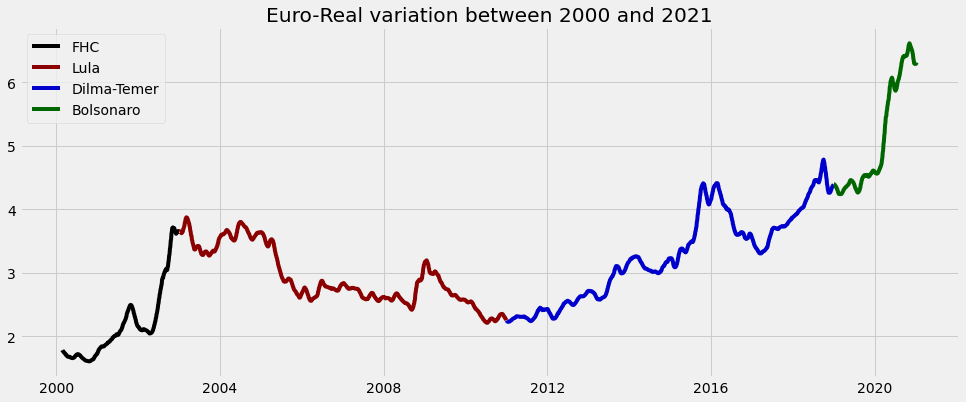

In [23]:
# Plotting the Euro-Real variation by Presidents

plt.figure(figsize=(15, 6))

plt.plot(fhc.Time, fhc.rolling_mean,
         label="FHC", color='#000000')
plt.plot(lula.Time, lula.rolling_mean,
         label="Lula", color='#8B0000')
plt.plot(dilma_temer.Time, dilma_temer.rolling_mean,
         label="Dilma-Temer", color='#0000CD')
plt.plot(bolsonaro.Time, bolsonaro.rolling_mean,
         label="Bolsonaro", color='#006600')

plt.legend()
plt.title('Euro-Real variation between 2000 and 2021')

plt.savefig("Images/Euro-Real.png")